
## Analisis de Aproximacion Anual para la Tienda Online de Videojuegos

 ___En esta Oportunidad tomaremos datos específicos del año anterior sobre las reseñas de usuarios y expertos, los géneros, las plataformas,y los datos históricos sobre las ventas de juegos que están disponibles en fuentes abiertas. Nuestro objetivo consiste en  identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias___.
 
 _Para my es un honor ser parte de este gran proyecto de analisis, ya que pondra a prueba mis habilidades mas relevantes, adquiridas hasta el momento, esperando que estas mismas me permitan completarlo con la mayor exactitud posible, para generar los mejores resultados para my compañia.Voy a generar Hipotesis objetivas, basandome en lo mas primordial, y sin perder de vista el principal motivo de este proyecto. Se lo importate que es para todos los departamnetos de la corporacion y No los voy a defraudar, estare siempre consentrado y motivado a resalizar el trabajo de la mejor manera posible_.


# 1. Importar las librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Se abre el archivo de datos.

In [2]:
df_gms = pd.read_csv('../data/games_data.csv')
df_gms.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


###  Se estudia la información general

In [3]:
df_gms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Podemos Observar que hay columnas con datos ausentes (**Critic_Score, Year_of_Relese, User_Score, Rating**).A continuacion vamos mostar los datos duplicados para decartar posibles inconsistencia en las graficas.

In [4]:
df_gms.duplicated().sum()

0

Asi podremos continuar nuestro analisis con seguridad de obtener la mayor cantidad de exactitud en nuestros resultados.

## Preparar los datos 

In [5]:
n_rows = df_gms.shape[0]
100 * df_gms.isna().sum() / n_rows

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Especificamos la cantidad de valores ausentes en nuestras filas y determinamos que hay un (***51% de estos en la columna Critic_Score, 40% en la columna User_score, y un 40% mas en la columna Rating***). En su mayoria se enccuentran destriburidos en estas 3 columnas especificas.

la columna Year_of_Release se encutentra en el tipo de dato incorrecto. La transformaremos a __entero__, ya que no necesariamnete la deberia ser  como float64 o datetime.

In [6]:
df_gms['Year_of_Release'] = df_gms['Year_of_Release']
df_gms['Year_of_Release'] = df_gms['Year_of_Release']

In [7]:
(df_gms['Year_of_Release'].dtype) 

dtype('float64')

In [8]:
df_gms['Year_of_Release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: Year_of_Release, Length: 16715, dtype: float64

Transformaamos la columna  (**Year of Realese**)  del tipo float64 al tipo int64 para eliminar el dato decimal.
si es necesario  podriamos cambiarla a Daetetime, para acceder a algun atributo, pero por el momento lo vamos a dejar asi

Consecuente a esto, tambien nos  serioraremos de la existencia o inexistencia de los valores que esten diplicados.

In [9]:
df_gms.duplicated().sum()

0

Al verificar que no existan valores duplicados, solo deberiamos cambiar los nombres de las columnas para poer trabajr de mejor manera con estas.

In [10]:
df_gms.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [11]:
df_gms.rename(columns = {'Name':'name',
                        'Platform':'platform',
                        'Year_of_Release':'year_of_release',
                        'Genre':'genre',
                        'NA_sales':'na_sales',
                        'EU_sales':'eu_sales',
                        'JP_sales':'jp_sales',
                        'Other_sales':'other_sales',
                        'Critic_Score':'critic_score',
                        'User_Score':'user_score',
                        'Rating':'rating'},inplace=True)

In [12]:
df_gms.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### trabajar los valores ausentes

In [13]:
n_rows = df_gms.shape[0]
100 * df_gms.isna().sum() / n_rows

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

La Mayor cantidad de valores ausentes esta en la columna (**critic_score**), con un _51%_ de valores usentes en esta columna, la cual nos dicta calificaciones de los críticos para los juegos, representadas como un valor numérico en una escala de 0 a 100. Estas calificaciones suelen ser proporcionadas por sitios web, revistas especializadas u otras fuentes de revisión de juegos  

Como son muchos valores ausentes, y no se encutra relacion con otras columnas para realizar una imputacion, vamos a asumir que los valores ausentes en esta columna, podrían deberse a que algunos juegos no han sido calificados por los críticos, y de momento la vamos a manterner asi.

In [14]:
df_gms['user_score'].isna().sum()

6701

La columna que dictamina las calificasiones de los usuarios para cada juego (**user_score**), tambien cuenta con una gran cantidad de valores ausentes.los valores ausentes en esta columna podrían deberse a que algunos juegos no han sido calificados por los usuarios.

In [15]:
tbd_count = df_gms['user_score'].str.contains('tbd').sum()
tbd_count

2424

"tbd" generalmente se utiliza en la industria de los videojuegos para indicar que la información  que está "por determinar" o "por definir". En el caso de la columna que denota la calificasion del usuario para cada videojuego (**user_score**). Vamos a reeplazarla por valores ausentes NAN.

In [16]:
df_gms['user_score'] = df_gms['user_score'].replace('tbd', np.nan)
tbd_count

2424

Reemplazamos con NaN, los valores 'tbd', para no tener afectasiones futuras. Ahora vamos a verificar de nuevo como vamos resulta  distribusion de valores ausentes en nustras filas

In [17]:
n_rows = df_gms.shape[0]
100 * df_gms.isna().sum() / n_rows

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Nuestra distribusion de valores ausentes en las filas ahora muestra,un incremento del **14%** de estos que corresponden a ,los valores en 'tbd' que reeplazamos por NaNs.

In [18]:
df_gms.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Luego de realizar los cambios necesarios, tambien hacemos una descripcion de la tabla para verificar como va nustro  preprocesamiento, antes de pasar a la siguinete intsancia. 

tenemos buenas medias y medianas y una proporsion de ventas similares en **jp_sales**,**eu_sales**, y **other_sales**, asi que vamos a crear una columna adicional en el Dataframe que nos muestre las ventas totales sumadas de todas las resgiones.

### calculo de las ventas totales de cada region

In [19]:
all_sales= df_gms['jp_sales'] + df_gms['eu_sales'] + df_gms['na_sales'] + df_gms['other_sales']
df_gms['all_sales'] = [0 if x < 0 else x for x in all_sales]
df_gms.query('all_sales > 0').head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


Se crea una nueva columna **'all_sales'**, que suma las ventas de cada reguion en especifico para cada juego.Ahora podremos tomarla en cuenta para seguir con nuestro analisis.

In [20]:
games_per_year = df_gms['year_of_release'].value_counts()
games_per_year.reset_index().head()

,year_of_release,count
0,2008.0,1427
1,2009.0,1426
2,2010.0,1255
3,2007.0,1197
4,2011.0,1136


Podemos observar que a medida que el tiempo avanza, la cantidad de juegos lanzados, y concon mayor  infierencia en el aumento de la misma.

In [21]:
games_per_year = df_gms.groupby('year_of_release').size().reset_index(name='num_games')
games_per_year.head()

,year_of_release,num_games
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


In [22]:
games_per_year.tail()

,year_of_release,num_games
32,2012.0,653
33,2013.0,544
34,2014.0,581
35,2015.0,606
36,2016.0,502


Al agrupar los datos por año de lanzanzamiento, contamos el numero de juegos lanzados por año utilizando el metodo .size(), creamos una nueva columna llamda **num_games**,  para obetner un DataFrame con dos columnas: 'year_of_release' y 'num_games', que muestra cuántos juegos fueron lanzados en cada año.

# 3 Analizar los Datos. Analizando las ventas por plataforma

Realizamos un analisis para obersar las ventas totales en nuestra columna 'all_sales', en cada una de las plataformas independientes mediante ciertas agrupaciones.

In [23]:
sales_by_platform = df_gms.groupby('platform')['year_of_release'].sum().sort_values(ascending=False)
sales_by_platform = df_gms.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
sales_by_platform = sales_by_platform.reset_index()
sales_by_platform.head()

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Obtenemos una tabla que nos muestra las plataformas y la cantidad de ventas generadas en cada una de ellas.Para visualizarla mejor y decidir cual plataforma es la que tiene manyor cantidad de ventas generadas en mmillos de dolares, utilizaremos un grafico de barras.

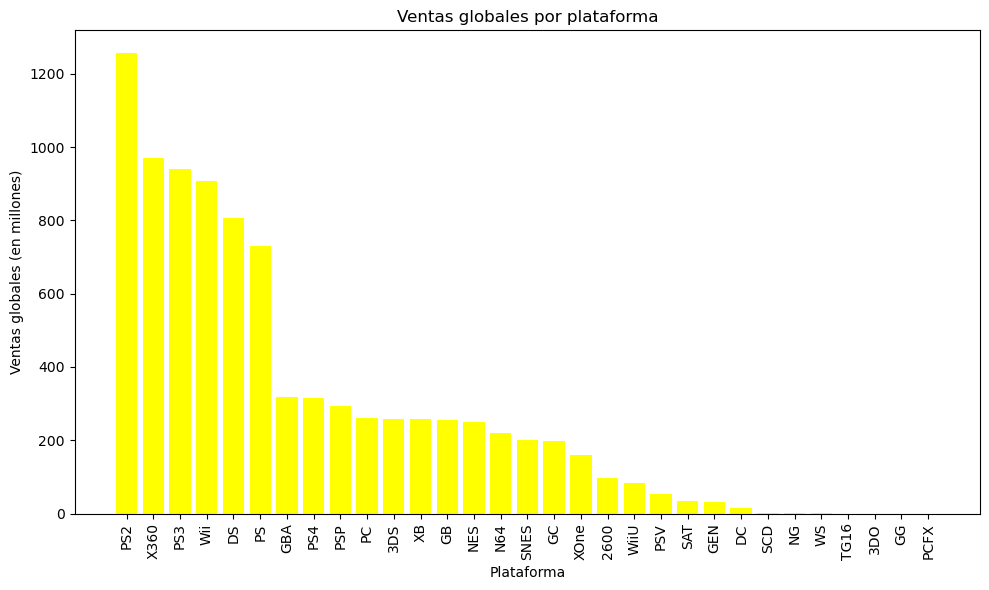

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_platform['platform'], sales_by_platform['all_sales'], color='yellow')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')
plt.title('Ventas globales por plataforma')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

Este grafico de barras nos indica que las plataformas de PS2  y X360 son las que en los ultimos años, han generado mayor cantidad de ventas, tomando en cunta que PS2 lleva una significativa delantera.

Acontinuasion vamos a  graficar la distribución de ventas de cada año y plataforma utilizando un gráfico de área apilada.

In [25]:
filtered_df = df_gms[(df_gms['year_of_release'] >= 2012) & (df_gms['year_of_release'] <= 2016)]
sales_by_year_platform = filtered_df.groupby(['year_of_release', 'platform'])['all_sales'].sum().unstack(fill_value=0)

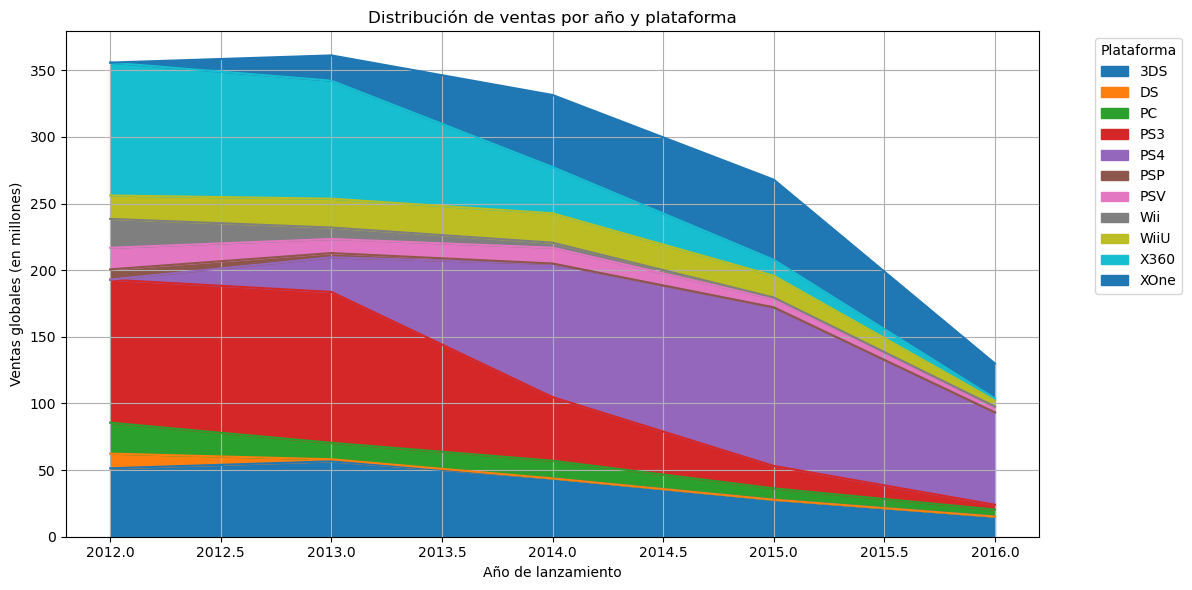

In [26]:
sales_by_year_platform.plot(kind='area', stacked=True, figsize=(12, 6))
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.title('Distribución de ventas por año y plataforma')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Ahora tenemos un grafico que nos muestra una distribusion basada en datos de cada año, para buscar las plataformas que solian ser populares, pero que ya no tienen ventas. De esta manera podemos tener una observasion mas detallada, ya que al asignarle un color especifico a cada plataforma, podriamos darnos una idea de cuales serian las plataformas que ya no son populares al verificar la ausencia de el color al que la plataforma fue asignado en el grafico de area apilada.

***Ahora vamos a buscar las plataformas que solían ser populares pero que ahora no tienen ventas, para verificar cuánto tardan generalmente las nuevas plataformas en aparecer.***

## .0 Elegir  varias plataformas potencialmente rentables

In [27]:
sales_by_platform_min = df_gms.groupby('platform')['all_sales'].sum().sort_values()
sales_by_platform_min.reset_index().head()

,platform,all_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


Obtenemos una tabla que nos indica cuales son las plataformas y su catidad de ventas ordenadas de menor a mayor. De esta manera, podriamos decir que observamos la lista de las 5 plataformas con menos ventas en nuestra tabla, y tambien podemos aplicar .tail() en lugar del .head(), para observar las plataformas con mayor cantidad de ventas.

Estas son las 5 plataformas con mayor cantidad de ventas generadas, sin embargo tambien es prudente realizar una agrupacion por año de lanzamineto para verificar el comportamiento de las plataformas

In [28]:
platform_sales_by_year = df_gms.groupby(['platform', 'year_of_release'])['all_sales'].sum().reset_index()
platform_sales_by_year

,platform,year_of_release,all_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
...,...,...,...
233,XB,2008.0,0.18
234,XOne,2013.0,18.96
235,XOne,2014.0,54.07
236,XOne,2015.0,60.14


De esta manera obtenemos una tabla que nos muestra las primras y ultimas filas de las plataforma, su año de lanzamiento y y las ventas generadas en cada uno de ellos.

__Gracias a esta tabla y  tambien a los graficos generados anteriormente, podemos concluir que una plataforma tarda de 5 a 9 años en desaparecer y que las nuevas plataformas aparacen de forma pediodica cada que se van descontinuando la plataformas debido a la ausencia de lanzaminetos de juego por año para cada una de ellas.__

In [29]:
sales_by_platform_min.reset_index().tail()

,platform,all_sales
26,DS,806.12
27,Wii,907.51
28,PS3,939.65
29,X360,971.42
30,PS2,1255.77


Estas son las 5 plataformas que han generado mayor cantiad de ventas en los ultimoos años. Vamos a tomar los años de lanzamineto de juegos en estas plataformas para generar un modelo para el año proximo, omitiendo valores ausentes y centrando nuestros analisis en los datos especificos que tenemos.

In [30]:
df_gms_e = df_gms[df_gms['year_of_release'] >= 2012]
sales_by_platform_mx = df_gms.groupby(['all_sales', 'year_of_release'])['platform'].sum().sort_values()
sales_by_platform_mx.reset_index().head()

,all_sales,year_of_release,platform
0,1.46,1981.0,2600
1,0.45,1985.0,2600
2,1.31,1983.0,2600
3,0.25,1987.0,2600
4,0.78,1983.0,2600


Especificamos nuestra lista en plataformas que tuvienron juegos lanzados desde el año 2014,para evaluar su comportamiento, y de esta manera lograr una prediccion mas exacta para el iguiente año.

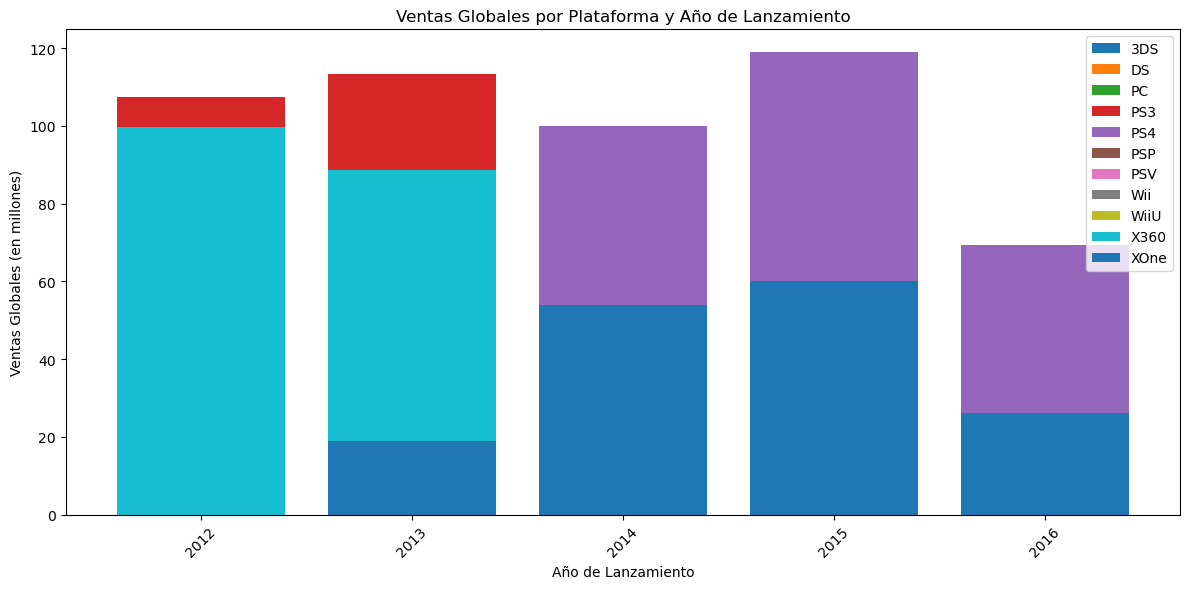

In [31]:
sales_by_platform_mx = df_gms_e.groupby(['platform', 'year_of_release'])['all_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
for platform in sales_by_platform_mx['platform'].unique():
    platform_data = sales_by_platform_mx[sales_by_platform_mx['platform'] == platform]
    plt.bar(platform_data['year_of_release'], platform_data['all_sales'], label=platform)

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Globales (en millones)')
plt.title('Ventas Globales por Plataforma y Año de Lanzamiento')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Determinamos de esta manera que las plataformas potencialmente mas rentables, son las de **'XOne'** y **'PS4'**, ya que en los ultimos años han tenido y se han mantenido en la posicion mas alta de ventas generadas, dando una mayor rentabilidad  la plataforma  de **'PS4'** que lidera el ranking de ventas en los ultimos 3 años importantes.

Tambien podemos observar un aumento de ventas para la plataforma de **'XOne'** en el año 2015, y un aumneto aun mayor para la platoforma **'PS4'** en ese mismo año, siendo uno de los mas rentables de los ultimos 4 años. Sin embargo en el año siguinte vemos una reduccion significativa de volumen de ventas para ambas plataformas pero mayormente dentro de la plataforma **'XOne'**

###   Generar un diagrama de caja.

***Ahora generaremos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma y veridicar si son significativas las diferencias en las ventas como   las ventas promedio en varias plataformas***

In [32]:
platform_medians = df_gms.groupby('platform')['all_sales'].median().sort_values()
sorted_platforms = platform_medians.index

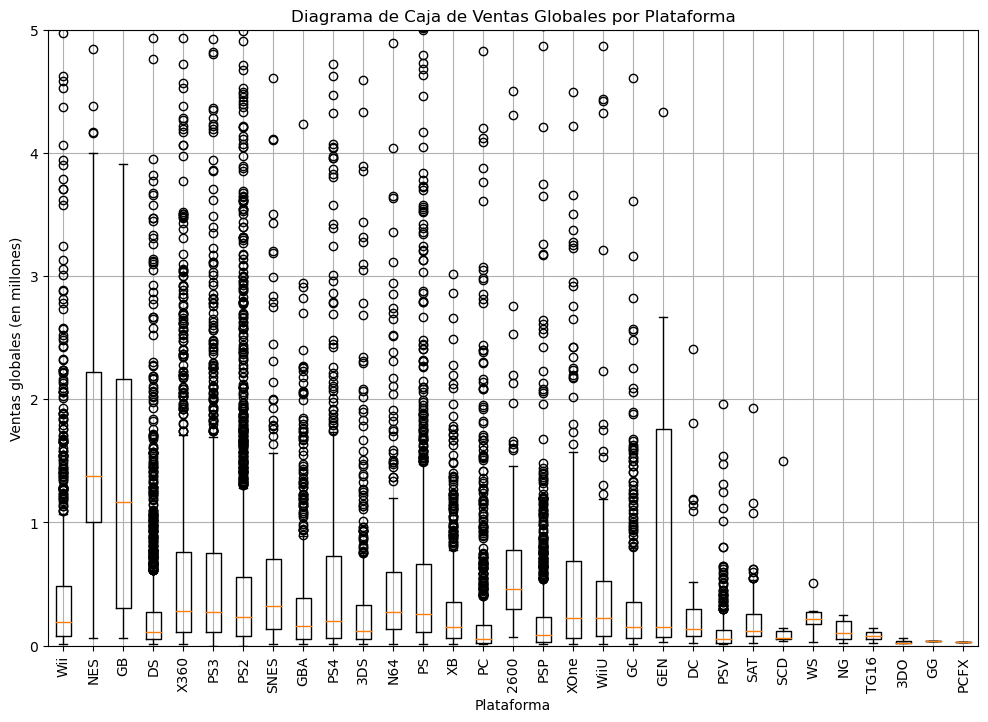

In [33]:
plt.figure(figsize=(12, 8))
plt.boxplot([df_gms[df_gms['platform'] == platform]['all_sales']
             for platform in df_gms['platform'].unique()],
            labels=df_gms['platform'].unique())

plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylim(0, 5)
plt.show()

Obtenemos un diagrama de caja ordenado y listo para su analisis y verificar que tan oprobable es que nuestros datos se sesguen. Y vamos a describirlo mejor.

El sigiente diagrama muestra las vnetas gobales de todos los juegos, desglosados por plataforma.Cada caja representa la distribución de las ventas para una plataforma específica. Las líneas dentro de las cajas representan la mediana, los bordes de las cajas representan el primer y tercer cuartil, y los "bigotes" representan la variabilidad fuera de los cuartiles.

Derterminamos de esta manera que dentro de  versiones dieferentes de la misma plataforma, como **'PS'**,**'WI'**,o **'Xbox** no hay una diferencia significativa en cuanto su volumen de ventas, sin embargdo donde si existen diferencias significativas es en plataformas diferentes, siendo **'GEN'**, **'NES** y **'GB'** las mas alejadas del promedio. Y  no tienen una relacion especificada

En cunato a las ventas promedio en cada plataforma, podriamos decir que se mantiene a la par dentro de las versiones mas actualizadas de cada plataforma, pero ocurre una variacion denytro del promedio en plataformas difefrentes sin relacion alguna, lo que causa que de 3 a 4 años cada plataforma qque no lance una version mas actualizada de la misma, se ira quedadndo atras y no recibira ningun lanzamineto de juegos en el futuro.

### Analizando el impacto del puntaje de cada usuario para una plataforma muy rentable.

Para mirar cómo las reseñas de usuarios y profesionales afectan las ventas las plataformas mas populares, tomaremos encuneta la plataforma **'PS'** y veremos como reaccionan los usuarios a esta plataforma.

In [34]:
df_gms.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

In [35]:
ps_df = df_gms[df_gms['platform'] == 'PS'][['user_score', 'critic_score', 'all_sales']]
ps_df.reset_index().head()

,index,user_score,critic_score,all_sales
0,52,8.7,96.0,10.95
1,65,9.2,92.0,9.72
2,67,9,93.0,9.49
3,88,8.6,90.0,7.86
4,95,NaN,NaN,7.57


Al filtrar el DataFrame para la plataforma **'PS'** notamos la precencia de ciertos valores asuntes, los cuales podria ser prudente eliminar y visualizar los datos en un grafico de dispersion

In [36]:
ps_df = df_gms[df_gms['platform'] == 'PS'][['user_score', 'critic_score', 'all_sales']].dropna()
ps_df.reset_index().head()

,index,user_score,critic_score,all_sales
0,52,8.7,96.0,10.95
1,65,9.2,92.0,9.72
2,67,9,93.0,9.49
3,88,8.6,90.0,7.86
4,106,9.1,96.0,7.18


A partir de este Dataframe, que no tiene valores ausentes, podremos generar nuestro grafico de dispersion y de esta manera calcular las correlaciones entre cada tipo de reseña y las ventas globales, para esta plataforma en especifico.

###   Calcular la correlación entre las reseñas y las ventas.

In [37]:
ps_df['user_score'] = pd.to_numeric(ps_df['user_score'], errors='coerce')
ps_df['critic_score'] = pd.to_numeric(ps_df['critic_score'], errors='coerce')

Tansfromamos las columnas a comparar a tipo numerico, solo  en esta comparacion para determinar con exactitud su correlacion en cuanto a las ventas de los juegos para la plataform a **'PS'**.

Correlación entre reseñas de usuarios y ventas globales en PS: 0.29848684510631907
Correlación entre reseñas de críticos y ventas globales en PS: 0.42860060939496036


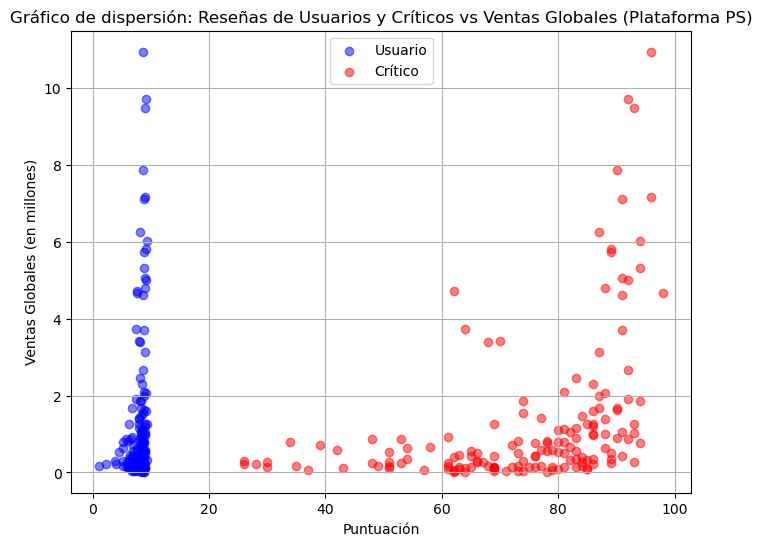

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(ps_df['user_score'], ps_df['all_sales'], color='blue', label='Usuario', alpha=0.5)
plt.scatter(ps_df['critic_score'], ps_df['all_sales'], color='red', label='Crítico', alpha=0.5)
plt.title('Gráfico de dispersión: Reseñas de Usuarios y Críticos vs Ventas Globales (Plataforma PS)')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Globales (en millones)')
plt.legend()
plt.grid(True)
user_correlation = ps_df['user_score'].corr(ps_df['all_sales'])
critic_correlation = ps_df['critic_score'].corr(ps_df['all_sales'])
print("Correlación entre reseñas de usuarios y ventas globales en PS:", user_correlation)
print("Correlación entre reseñas de críticos y ventas globales en PS:", critic_correlation)

plt.show()

Determinamos entonces, despues de esta visualizasion, que las reseñas de los criticos,afectan mas las ventas de una plataforma popular que las reseñas de los usuarios, sin embargo esta cunclusion es aceptada para este grafico de dispersion dentro de la plataforma **'PS'**, por lo que tambien pude ser prudente comparar con otras plataformas para llegar a una colclusion mas exacta.

A continuacion los mas sencillo que puedo hacer para realizar esta comparacion especificada, es generar un dataframe, que contengas las plataformas con la mayor cantidad de ventas en los ultimos años considerados que son **'PS4'**, **'X360'** y **'XOne'**, para que nos ayude a ver que jeugos fueron los mas populares para estas plataformas.

In [39]:
plataformas = ['PS4', 'X360', 'XOne']
juegos_populares = pd.DataFrame()

for plataforma in plataformas:
    juegos_plataforma = df_gms[df_gms['platform'] == plataforma].nlargest(5, 'all_sales')
    
    
    juegos_populares = pd.concat([juegos_populares, juegos_plataforma])

juegos_populares.reset_index(drop=True, inplace=True)

In [40]:
juegos_populares.reset_index().head(9)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,2,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,3,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
4,4,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
5,5,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
6,6,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
7,7,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
8,8,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62


De esta forma sleccionamos las plataformas mas populares y comparar las ventas de distintos juegos en otras plataformas.

De esta manera generamos un dataframe ,que contiene con tiene los juegos mas populares en las plataformas que han tenido mayores ventas en los ultimos años, para obetner los juegos de mayores ventas en cada una de ellas.

Ahora vamos a compara estos juegos con otras plataformas y sus respectivas ventas, para verificar si de manera general podriamos asumir que tienen mayor populariad y por ende mayor nivel de ventas en plataformas diferentes.

In [41]:
juegos_interes = ['Grand Theft Auto V', 'Call of Duty: Black Ops 3', 'FIFA 18']

df_interes = df_gms[df_gms['name'].isin(juegos_interes)]

ventas_juegos_interes = df_interes[['name', 'platform', 'all_sales']]
ventas_juegos_interes.reset_index()

,index,name,platform,all_sales
0,16,Grand Theft Auto V,PS3,21.05
1,23,Grand Theft Auto V,X360,16.27
2,31,Call of Duty: Black Ops 3,PS4,14.63
3,42,Grand Theft Auto V,PS4,12.62
4,99,Call of Duty: Black Ops 3,XOne,7.39
5,165,Grand Theft Auto V,XOne,5.47
6,1049,Call of Duty: Black Ops 3,X360,1.70
7,1062,Call of Duty: Black Ops 3,PS3,1.69
8,1730,Grand Theft Auto V,PC,1.17
9,6463,Call of Duty: Black Ops 3,PC,0.26


Determinamos de esta forma si bien existe juegos con mayor cantidad de ventas en otras plataformas. Las que se han mantenido en los ultimos años son los juegos de **'Call of Duty'**, **'Grand Theft Auto'** y **'FIFA'**, y sus versiones mas actualizadas en un volumen estable de ventas acsendentes.

### Analisis por genero 

Ahora vamos a verificar los generos de mayor interes y determinar de esta forma, si podemos generalizar acerca de los géneros con ventas altas y bajas.

In [42]:
genre_counts = df_gms['genre'].value_counts()
genre_counts.reset_index()

,genre,count
0,Action,3369
1,Sports,2348
2,Misc,1750
3,Role-Playing,1498
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,873
9,Fighting,849


Aqui contamos la cantidad de juegos en cada género utilizando value_counts() en la columna 'genre'. Tambien puede ser prudente generar un grafico de barras para visualizarla  de mejor manera.

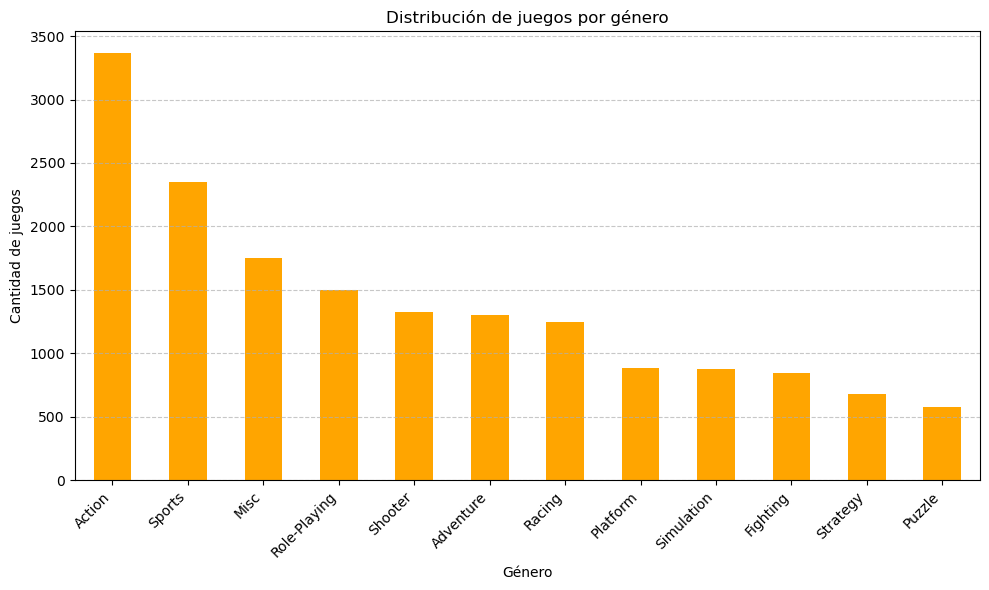

In [43]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='orange')
plt.title('Distribución de juegos por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El genero de accion es el que tiene mayor cantidad de juegos por plataforma, y tambien el genero de deportes con mas de 2000 liderando la lista.

Y tambien realizaremos una agrupacion con la columna 'all_sales', para verificar cuales generos son los mas rentables que tenemos, y de esta manera llegar a geneneralizar acerca de los géneros con ventas altas y bajas en función de estas ventas totales.

In [44]:
ventas_por_genero = df_gms.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
ventas_por_genero.reset_index().head()

,genre,all_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77


Con este enfoque, podemos analizar las ventas totales de cada género  en función de estas ventas totales en general.

In [45]:
ventas_por_genero = ventas_por_genero.reset_index()
ventas_por_genero

,genre,all_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


Primero convertimos la Serie ventas_por_genero en un DataFrame utilizando el método reset_index(), y luego procedemos a graficar las ventas por género.

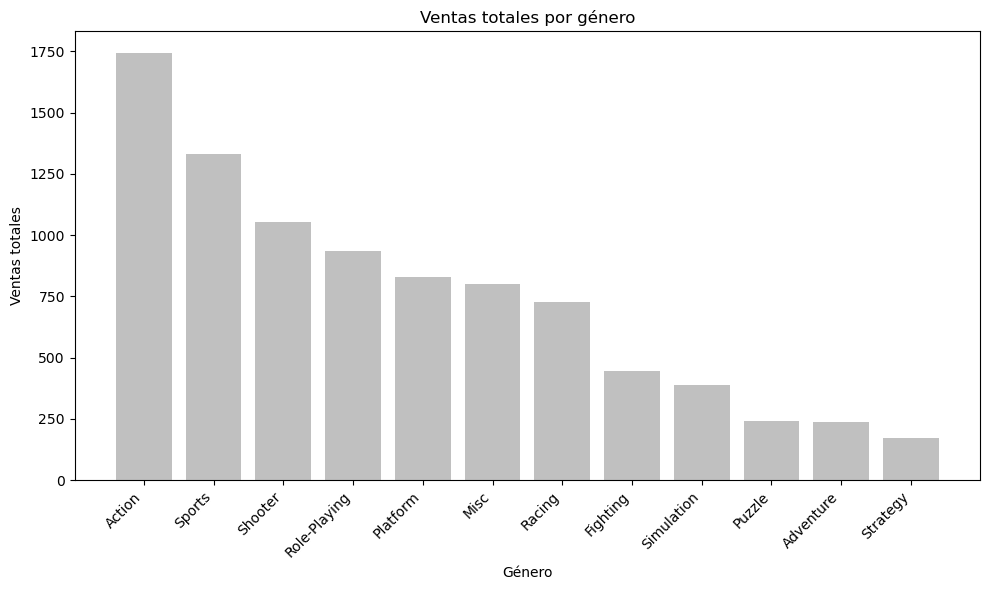

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_genero['genre'], ventas_por_genero['all_sales'], color='silver')
plt.xlabel('Género')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Determinamos de esta manera que los generos mas rentables son los de **'Action'**, **'Sports'** y **'Shooter'**. Y tambien los mas populares debido a que tienen las mejores calidficasiones por usuarios y expertos. 

Podriamos generalizar sobre acerca de los géneros con ventas altas, determinando que estas corresponden a genreos  que tienen mayor cantidad de plataformas y se actualizan mas contantemente a cada una de ellas.

Y de la misma forma tambien determinamos que los generos con ventas mas bajas, corresponden a juegos que no han recibido una actualizasion para plataformas mas rentables. Como los generos de **'Puzzle'**, o **'Strategy'** los cuales no tienen juegos que corran en las plataformas mas rentables y hace que sus ventas sean limitadas o  mas bajas.

# 4. Crea un perfil de usuario para cada región

###### 4.1 Ahora determinaremos las 5 plataformas principales para cada reguion especifica.

In [47]:
region_plataforma_sls = df_gms.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']].sum()
pricpl_region_pltsfrm = region_plataforma_sls.apply(lambda x: x.nlargest(5), axis=0)
pricpl_region_pltsfrm.head()

,na_sales,eu_sales,jp_sales,other_sales,all_sales
platform,,,,,
3DS,NaN,NaN,100.67,NaN,NaN
DS,382.40,NaN,175.57,59.26,806.12
PS,NaN,213.61,139.82,NaN,NaN
PS2,583.84,339.29,139.20,193.44,1255.77
PS3,393.49,330.29,NaN,135.68,939.65


Asi hemos generado un DataFrame llamado **'pricpl_region_pltsfrm'**, que contendrá las cinco plataformas principales para cada región, y pese a los valores ausentes en ciertas filas, notamos exelentes numeros de ventas en las plataformas de Play_Station y sus derivados.

In [48]:
df_gms_clean = df_gms.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
df_gms_clean = pricpl_region_pltsfrm.dropna()
df_gms_clean.head()

,na_sales,eu_sales,jp_sales,other_sales,all_sales
platform,,,,,
PS2,583.84,339.29,139.2,193.44,1255.77


In [49]:
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
  region_plataforma_sls = pricpl_region_pltsfrm.sort_values(by=region, ascending=False)
  top_plataformas = region_plataforma_sls.head(5)
  # Recorrer columnas de top_plataformas y asignar valores por columna
  for col in top_plataformas.columns:
    pricpl_region_pltsfrm[region] = top_plataformas[col]  # Asignación por columna
  top_plataformas.dropna()
  top_plataformas.head()

**Esta tabla calcula  las ventas totales por plataforma en cada región y luego determina las cinco plataformas principales en función de esas ventas totales.De esta manera determinamos que las 5 principales plataformas especificas corresponden a 'PS2', 'PS3', 'X360', 'Wii', y 'DS', respectivamennte.**

###### 4.2 Ahora compararemos estas cuotas de mercado entre las diferentes regiones para cada una de las cinco plataformas principales.

Para esto generaremos diferentes graficos de barras para poder describir, las variaciones en las cuotas de mercado de una región a otra.

In [50]:
ventas_por_region_y_plataforma = df_gms.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
plataformas_principales_por_region = {}
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    region_plataforma_sls = ventas_por_region_y_plataforma.sort_values(by=region, ascending=False)
    top_plataformas = region_plataforma_sls.head(5)
    plataformas_principales_por_region[region] = top_plataformas
top_plataformas.dropna()
top_plataformas

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
PS2,583.84,339.29,139.20,193.44
PS3,393.49,330.29,80.19,135.68
X360,602.47,270.76,12.43,85.76
Wii,496.90,262.21,69.33,79.07
DS,382.40,188.89,175.57,59.26


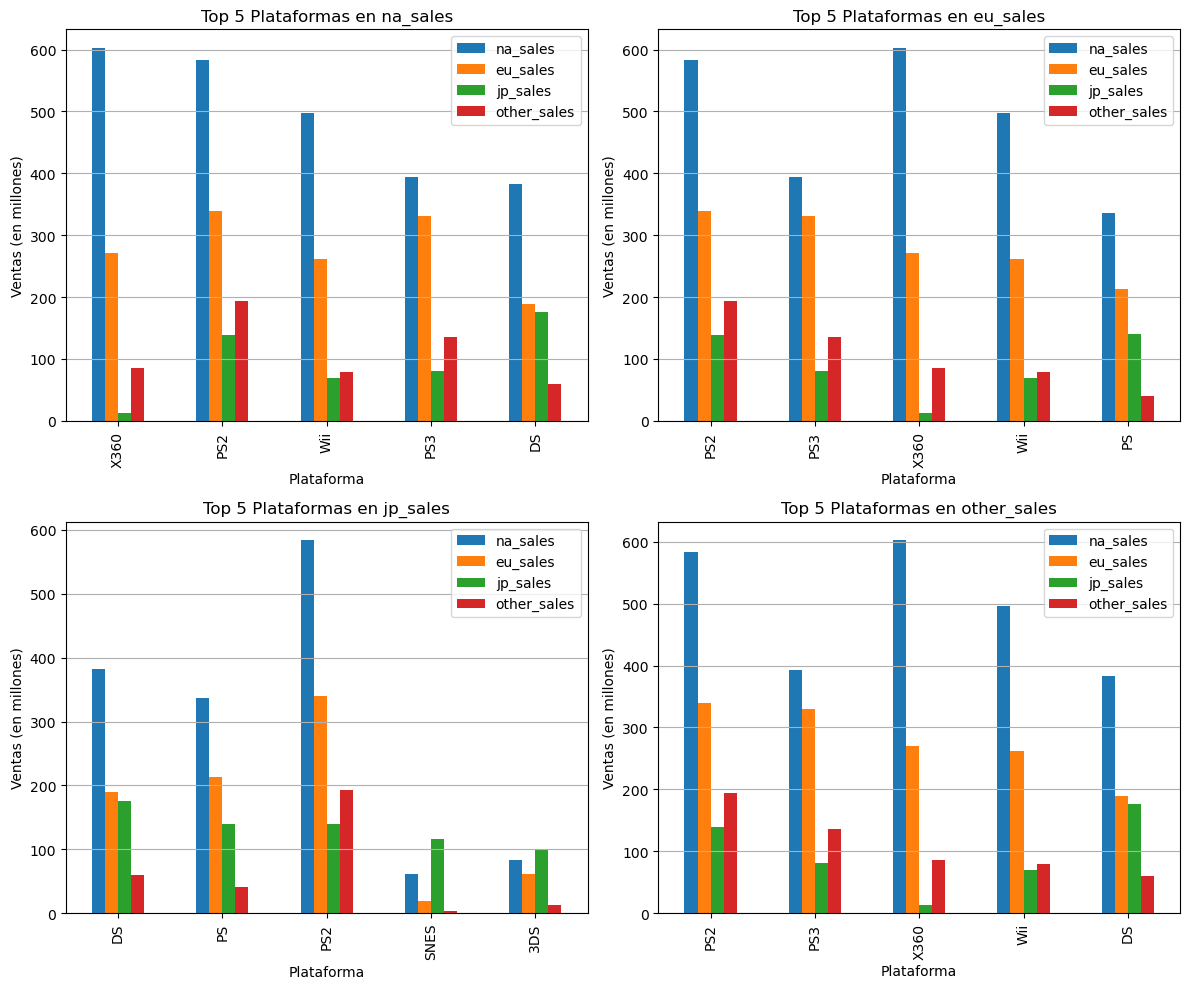

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, (region, top_plataformas) in enumerate(plataformas_principales_por_region.items()):
    ax = axes[i // 2, i % 2]
    top_plataformas.plot(kind='bar', ax=ax)
    ax.set_title(f"Top 5 Plataformas en {region}")
    ax.set_xlabel("Plataforma")
    ax.set_ylabel("Ventas (en millones)")
    ax.grid(axis='y')
plt.tight_layout()
plt.show()

Las plataformas de Xbox y de Play Station predominan en èu_sales', 'na_sales' y 'other_sales'.

Sin embargo en 'jp_sales' notamos un predoinio principal en ventas por la plataforma 'PS2' que se pocisiona en todas las reguiones como la mas rentable, pero a diferencia de otras regiones o the 'other_sales', en esta regiuion no encontramos a 'X360' como una de las principales plataformas que determinamos anterioirmente.

***En cuanto a las variaciones de mercado en plataformas de una region a otra, podriamos decir que la plataforma de **'PS2'** predomina en cada una de las regiones asi como tambien la plataforma sw **'X360'** a ecepcionde la region jp_sales quien no cuenta con esta plataforma dentro de su top.***

###### 4.3 A continuacion vamor a determinar los cinco géneros principales. y a verificar sus diferencias principales.

In [52]:
sales_gnre = df_gms.groupby('genre')['all_sales'].sum()
sales_gnre = sales_gnre.sort_values(ascending=False)
sales_gnre.reset_index().head(5)

,genre,all_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77


Asi calculamos las ventas totales por género, y seleccionará los cinco géneros principales. Para explicar sus dierencias especificas, vamos a generar un grafico de barras para poder visualizarlos de mejor manera. Esta vez lo haremos muy dinamico para que nos muestre lo que queremos ver en especifico

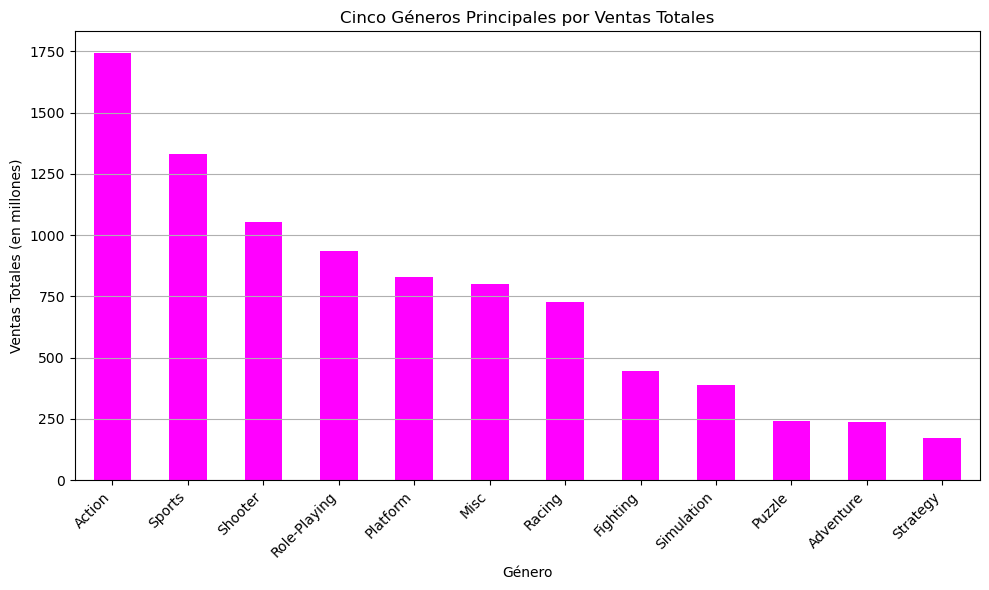

In [53]:
df_gms_2014 = df_gms[df_gms['year_of_release'] >= 2014]
sales_gnre.plot(kind='bar', figsize=(10, 6), color='magenta')
plt.title('Cinco Géneros Principales por Ventas Totales')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Asi determinamos que el genero lider en ventas es el de **'Action'**, seguido por  **'Sports'**, **'Shooter'** y **'Role-Playing'**. En cuanto a 'Action y 'Shooter', son generos parecidos pero debemos ser mas objetivos en esta parte, asi que hasta el momento y tomando en cuenta los analisis previos de plataformas, si podriamos determinar que son generos que tiene gran cantidad de juegos en diferentes plataformas y debido a ello abarcan mas usuarios y sus ventas siempre son las mas altas.

###### 4.4 Tambien es importante determinar si las clasificaciones de ESRB afectan a las ventas en regiones individuales. Asi que vamos  a revisar esta parte tambien.

In [54]:
df_gms_2014 = df_gms[df_gms['year_of_release'] >= 2014]
regiones = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
ventas_por_esrb_y_region = df_gms_2014.groupby(['rating'])[regiones].sum().reset_index()
ventas_por_esrb_y_region

,rating,na_sales,eu_sales,jp_sales,other_sales
0,E,50.74,58.06,8.94,15.39
1,E10+,33.23,26.16,4.46,7.83
2,M,96.42,93.44,8.01,28.67
3,T,38.95,34.07,14.78,11.33


Vamos a generar un grafico de barras para visualizar esta tabla

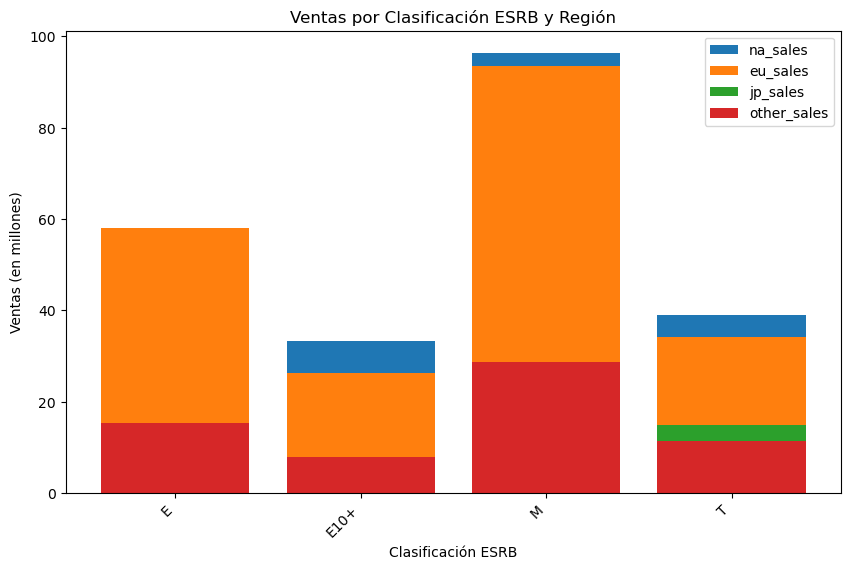

In [55]:
plt.figure(figsize=(10, 6))
for region in regiones:
    plt.bar(ventas_por_esrb_y_region['rating'], ventas_por_esrb_y_region[region], label=region)
plt.title('Ventas por Clasificación ESRB y Región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Este gráfico permite visualizar fácilmente cómo varían las ventas de videojuegos por clasificación ESRB en diferentes regiones. Cada barra representa una clasificación ESRB y los diferentes colores de las barras corresponden a las diferentes regiones.

**Asi determinamos que las calificasiones de ESRB afesctan las ventas de ciertas regiones individuales como 'jp_sales' o 'eu_sales, ya que estas son las reguiones mas irregulares segun su calificasion especifica. Aun asi, podemos ver una notoria alza de resultados por la calificasion 'M' de ESRB**

# 5 Pruebas de Hipotesis

Al tener demasiada similitud en las calificasiones de los usuarios en genral para las plataformas 'XboxOne' y 'PC', vamos a generar nuestra hipoteis nula basandonos en el hecho de que las calificasiones para estas platformas son las mismas. Para ello, lo primero sera filtar los datos y eliminar los valores auusentes en las columnas de interes.

In [56]:
xbox_one_ratings = df_gms[df_gms['platform'] == 'XOne']['user_score'].dropna().astype('float')
pc_ratings = df_gms[df_gms['platform'] == 'PC']['user_score'].dropna().astype('float')
xbox_one_ratings.reset_index().head()

,index,user_score
0,165,7.9
1,179,5.4
2,242,6.4
3,270,6.2
4,373,4.1


In [57]:
pc_ratings.reset_index().head()

,index,user_score
0,85,7.6
1,138,7.3
2,192,4.0
3,218,8.2
4,284,9.1


Generamos asi 2 tablas. 'xbox_one_ratings' que muestra las calificasiones de los usuarios para la plataforma 'XOne' y 'pc_ratings' que a su vez, nos indica las calificasiones para plataforma 'PC', y tambien realizamos una descripcion de las series.

###### 5.1 Generacion de Hipotesis 1.

***H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.***

***H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.***

In [58]:
calificaciones_xbox = xbox_one_ratings
calificaciones_pc = pc_ratings

t_statistic, p_value = stats.ttest_ind(calificaciones_xbox, calificaciones_pc)


print("Estadístico t:", t_statistic)
print("Valor p:", p_value)


alpha = 0.05  
if p_value < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula.")
    print("Las calificaciones promedio son diferentes entre las dos plataformas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay diferencias significativas en las calificaciones promedio entre las dos plataformas.")

Estadístico t: -4.368333815003015
Valor p: 1.3896435533548819e-05
Hay evidencia suficiente para rechazar la hipótesis nula.
Las calificaciones promedio son diferentes entre las dos plataformas.


De esta manera concluimos que nuesta hipotesis alternativa H1, la cual dicta que **Las calificaciones promedio de los usuarios para las plataformas 'XboxOne' y 'PC' son diferentes** es la correcta segun este test. Rechazando de esta manera la hipotesis nula H0, debido a que tenemos una diferencia estadistica significativa entre el promedio de las calificasiones para ambas plataformas.

###### 5.2 Generacion de Hipotesis 2.

La siguiente hipotesis a comprobar es sobre la calificasion en los generos mas populares. En este caso, lo que vamos a probar es que a pesar de que existen muchas similitudesen las calificasiones de los generos de Accion y Deportes, en promedio son diferentes.

**H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

**H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.**

In [59]:
genres_of_interest = ['Action', 'Sports']
filtered_df = df_gms[df_gms['genre'].isin(genres_of_interest)]
filtered_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


Filtramos el conjunto de datos  en primera instancia para incluir solo las calificaciones de los usuarios y los géneros de Acción y Deportes. Utilizamos el método isin() de Pandas para crear un filtro booleano que selecciona solo las filas donde el valor de la columna "genre" coincide con alguno de los géneros de interés.

Luego realizamos un analisis esdtadistico de los datos para calcular y despues compara las estadisticas descriptivas.

In [60]:
action_ratings = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna().astype(float)
sports_ratings = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna().astype(float)
action_mean = action_ratings.mean()
action_mean

7.054043715846995

In [61]:
sports_mean = sports_ratings.mean()
sports_mean

6.961196736174069

In [62]:
levene_statistic, levene_p_value = stats.levene(action_ratings, sports_ratings)
equal_var = True
if levene_p_value < alpha:
    print("Las varianzas no son iguales. Usaremos equal_var=False en la prueba t.")
    equal_var = False
else:
    print("No se puede rechazar la hipótesis nula de igualdad de varianzas. Usaremos equal_var=True en la prueba t.")

Las varianzas no son iguales. Usaremos equal_var=False en la prueba t.


In [63]:
t_statistic, p_value = stats.ttest_ind(action_ratings, sports_ratings)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula.")
    print("Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay diferencias significativas en las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.")

Estadístico t: 1.6259419280500857
Valor p: 0.10406951359049141
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay diferencias significativas en las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.


De esta forma nos quedamos con nuestra hipostesis nula H0, la cual dicta que **Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**, Sin embargo esta diferencia promedio entre puntajes no es tan significativa para ambos ambos generos como tal, ya que tienen una difecia de 0.1 en el puntaje para estos generos.

Tanto Las hipotesis nulas y alternativas fueron generadas a partir de la similitud en tre las calificasiones para ciertas plataformas y generos de juegos en especifico, lo cual es importante, tener presente para la proyeccion del procimo año, ya que de esta manera ahora sabremos mas exactamente es la plataforma y el genero que mas  ha agradado a los usuarios en general, y podriamos empezar ha hacer enfasis en ello.

Para generar las hipotesis se considero el citerio de la importancia  por que estos generos y plataformas son las que han tenido mejores resultados en el ultimo año, con el obsejitivo de empezar por los generos y plataformnas especificas, que sean mas rentables en los ultimos años.

# 6 Conslusion general

A lo largo de este proyecto hemos logrado una proyeccion sobre las plataformas mas importantes, los generos mas popularers y rentables como tambien las ventas y calificasiones en cada reguion, se detecto patrones relevantes sobre los jusgos mas exitosos al igual que las plataformas mas rentables, para generar prometedores proyectos para el proximo año y planificar excelentes campañas publicitarias, tomando en cuneta las siguientes conclusiones.

**1. Las plataformas en promedio tardan de 5 a 9 años en desaparecer y que las nuevas plataformas aparacen de forma pediodica cada que se van descontinuando la plataformas debido a la ausencia de lanzaminetos de juego por año para cada una de ellas.**

**2. Si bien existe juegos con mayor cantidad de ventas en otras plataformas. Las que se han mantenido en los ultimos años son los juegos de **'Call of Duty'**, **'Grand Theft Auto'** y **'FIFA'**, y sus versiones mas actualizadas en un volumen estable de ventas acsendentes.**

**3. Determinamos de esta manera que los generos mas rentables son los de **'Action'**, **'Sports'** y **'Shooter'**. Y tambien los mas populares debido a que tienen las mejores calidficasiones por usuarios y expertos.**

**4. Podriamos generalizar sobre acerca de los géneros con ventas altas, determinando que estas corresponden a genreos que tienen mayor cantidad de plataformas y se actualizan mas contantemente a cada una de ellas.**

**5. Las calificaciones promedio de los usuarios para las plataformas 'XboxOne' y 'PC' son diferentes.**

**6. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

***Tomando en cunta estas conclusiones, el resto de departamnetos optara por tomar excelentes decisiones para el proximo año. Muchos exitos para todo el equipo.***

Este ha sido un gran reto para my ya que puse a prueba mis habilidades aprendidas hasta el momento, sin embargo se que ha sido suficiente para llegar con exito al final de este proyecto integrado. Detenrminando una buena proyeccion para el siguiente año y sobre todo generando mucho valor para la compañia a la cual preste mis servicios como analista der datos.